## Canada - Admissions of Permanent Residents by Country of Citizenship, January 2015 - December 2020

### Introduction

Over the past few years, Immigration, Refugees and Citizenship Canada (IRCC) has repeatedly announced its ambitious immigration plans, which has attracted great attention from public media and prospective candidates. 

By analyzing the admission data, we try to answer the following questions:
- Question 1: What are the five largest origins of new Canada immigrants?
- Question 2: For the five largest origins of new Canada immigrants, how does the annual total change over time?

### Load and Clean Data

In [1]:
import pandas as pd
import os
import xlrd
import matplotlib.pyplot as plt
from multiplot import multiplot #User defined function
from clean_col import clean_col #User defined function



In [2]:
# Loading raw data download from IRCC website
file = os.path.join(os.getcwd(),'IRCC_M_PRadmiss_0002_E.xls')
# Read data and remove header & footer
data = pd.read_excel(file,skiprows=4,skipfooter=4)

In [3]:
# Examine data
data.head()

,Unnamed: 0,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,...,Q2 Total.5,Jul.5,Aug.5,Sep.5,Q3 Total.5,Oct.5,Nov.5,Dec.5,Q4 Total.5,Unnamed: 102
0,Afghanistan,90,125,220,435,135,220,195,555,250,...,95,85,95,180,360,120,185,160,465,1655
1,Albania,15,25,50,90,45,45,75,165,45,...,45,30,20,20,70,20,30,10,60,285
2,Algeria,80,125,235,440,255,340,280,875,310,...,260,335,440,310,1085,270,175,200,645,2715
3,Andorra,0,0,0,0,--,0,0,--,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,--,0,--,--,10,--,--,15,--,...,--,--,--,--,10,5,--,--,10,35


There are obvious issues with the raw data: i) the column names need to be corrected and add year information. ii) the missing valeus may need to be inputed based on use case.

In [4]:
col_names = [clean_col(i) for i in data.columns] # Use the user-defined function
data.columns = col_names
data.set_index('Country',inplace=True)
data.head()

,"Jan, 2015","Feb, 2015","Mar, 2015","Q1 Total, 2015","Apr, 2015","May, 2015","Jun, 2015","Q2 Total, 2015","Jul, 2015","Aug, 2015",...,"Q2 Total, 2020","Jul, 2020","Aug, 2020","Sep, 2020","Q3 Total, 2020","Oct, 2020","Nov, 2020","Dec, 2020","Q4 Total, 2020","Total, 2020"
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,435,135,220,195,555,250,145,...,95,85,95,180,360,120,185,160,465,1655
Albania,15,25,50,90,45,45,75,165,45,65,...,45,30,20,20,70,20,30,10,60,285
Algeria,80,125,235,440,255,340,280,875,310,280,...,260,335,440,310,1085,270,175,200,645,2715
Andorra,0,0,0,0,--,0,0,--,0,--,...,0,0,0,0,0,0,0,0,0,0
Angola,--,0,--,--,10,--,--,15,--,--,...,--,--,--,--,10,5,--,--,10,35


Filling NULL values: Because this data is obtained from IRCC, it's unlikely the missing values are due to undocumentaed immigration cases. In the notes, it is mentioned that Null values are all between 0~5 . Therefore, we fill all missing values as 0.



In [5]:
data = data.applymap(lambda x: 0 if x == '--' else int(x))
data.head()

,"Jan, 2015","Feb, 2015","Mar, 2015","Q1 Total, 2015","Apr, 2015","May, 2015","Jun, 2015","Q2 Total, 2015","Jul, 2015","Aug, 2015",...,"Q2 Total, 2020","Jul, 2020","Aug, 2020","Sep, 2020","Q3 Total, 2020","Oct, 2020","Nov, 2020","Dec, 2020","Q4 Total, 2020","Total, 2020"
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,435,135,220,195,555,250,145,...,95,85,95,180,360,120,185,160,465,1655
Albania,15,25,50,90,45,45,75,165,45,65,...,45,30,20,20,70,20,30,10,60,285
Algeria,80,125,235,440,255,340,280,875,310,280,...,260,335,440,310,1085,270,175,200,645,2715
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,10,0,0,15,0,0,...,0,0,0,0,10,5,0,0,10,35


### Analyze Data

Question 1: What are the five largest origins of new Canada immigrants?

Text(0, 0.5, 'Number of cases')

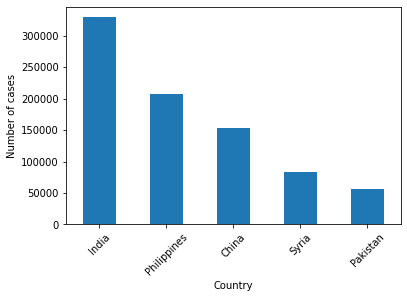

In [6]:
largest_5 = data[['Total, 2015','Total, 2016','Total, 2017','Total, 2018','Total, 2019','Total, 2020']] #Only keep annual summary
largest_5.drop(['Country not stated','Total'],axis=0,inplace=True) #Reset column using Contry column
largest_5['Total, 5years'] = largest_5.sum(axis=1) #Calculate 5-year total
largest_5.rename(index={'China, People\'s Republic of':'China'},inplace=True) #Shorten Name
largest_5['Total, 5years'].sort_values(ascending=False).head().plot(kind='bar', rot=45) # Sort and Plot
plt.ylabel('Number of cases')


Question 2: For the five largest origins of new Canada immigrants, how does the annual total change over time?

Text(0, 0.5, 'Number of cases')

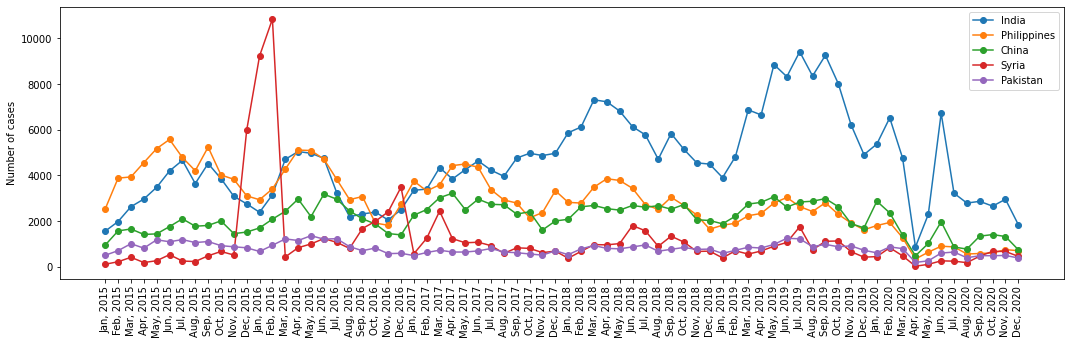

In [7]:
largest_5 = data.loc[['India','Philippines','China, People\'s Republic of','Syria','Pakistan']]
largest_5 = largest_5[[i for i in largest_5.columns if (i[0] !='Q') & (i[0] != 'T')]] #Remove summary columns
largest_5.rename(index={'China, People\'s Republic of':'China'},inplace=True) #Shorten Name

plt.figure(figsize=(18,5))
multiplot(largest_5)
plt.ylabel('Number of cases')

From the plot above, a few insights can be drawn:
   -  Number of new immigrants from Philippines delines overtime.
   -  A huge influx of immigrants from Syria around the end of 2015, which is due to the refugee resettelment.
   -  A siginificant drop across all countries in April 2020, which is due to the Covid Lockdown.
   -  The number of cases bounce back in June 2020 for a short period of time, this may be associated with the reopening of FSW draws.
